In [19]:
# %pip install matplotlib
import librosa.display
import numpy as np
from matplotlib import pyplot as plt
import os
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
import seaborn as sns

In [3]:
model = keras.models.load_model('./cnnmodel.h5')

In [11]:
BATCH_SIZE=8
TARGET_SIZEX=223
TARGET_SIZEY=217
NUM_CLASSES=10
val_ds=image_dataset_from_directory(
  "./images",
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(TARGET_SIZEX, TARGET_SIZEY),
  batch_size=BATCH_SIZE)

Found 947 files belonging to 10 classes.
Using 189 files for validation.


In [59]:
y=[]
yp=[]
for element in val_ds.as_numpy_iterator():
    yy=(element[1])
#     print(yy)
    xx=element[0]
    y=[*y,*yy]
    yp=[*yp,*model.predict_classes(xx)]

print(len(y),len(yp))

189 189


[5, 4, 9, 2, 9, 1, 2, 3, 7, 1, 4, 4, 9, 3, 4, 6, 6, 2, 7, 1, 5, 0, 7, 5, 8, 2, 2, 1, 9, 7, 6, 7, 8, 9, 7, 2, 8, 4, 8, 1, 7, 1, 8, 9, 7, 7, 0, 6, 4, 3, 0, 9, 7, 2, 0, 7, 6, 7, 4, 6, 8, 2, 5, 1, 0, 4, 3, 8, 3, 2, 9, 8, 5, 0, 1, 0, 3, 9, 6, 6, 0, 2, 6, 6, 8, 2, 7, 1, 0, 9, 6, 8, 9, 2, 3, 4, 7, 6, 7, 2, 0, 9, 2, 7, 4, 8, 1, 7, 6, 9, 8, 2, 0, 1, 4, 2, 0, 4, 7, 7, 9, 3, 7, 0, 9, 2, 4, 1, 7, 4, 3, 8, 8, 3, 1, 2, 3, 3, 2, 2, 4, 7, 2, 6, 4, 8, 9, 0, 0, 9, 3, 9, 7, 2, 9, 6, 2, 4, 3, 1, 9, 4, 3, 6, 9, 4, 9, 2, 4, 4, 9, 8, 6, 8, 3, 4, 3, 7, 0, 2, 4, 1, 4, 4, 7, 1, 1, 7, 0] [5, 4, 3, 2, 9, 1, 0, 0, 7, 1, 4, 4, 8, 7, 3, 6, 6, 2, 7, 1, 5, 0, 7, 0, 8, 2, 2, 8, 8, 7, 6, 7, 8, 9, 7, 1, 8, 4, 4, 1, 3, 1, 8, 3, 7, 7, 0, 6, 4, 6, 0, 0, 5, 2, 0, 7, 6, 7, 4, 6, 8, 2, 5, 2, 0, 8, 3, 8, 9, 4, 7, 8, 5, 0, 1, 0, 3, 2, 6, 6, 0, 0, 6, 6, 8, 9, 7, 5, 0, 8, 6, 8, 6, 2, 8, 4, 2, 6, 3, 5, 0, 2, 2, 8, 4, 8, 1, 7, 6, 9, 0, 2, 1, 1, 4, 2, 0, 4, 7, 7, 2, 3, 7, 0, 3, 8, 4, 1, 7, 4, 3, 8, 8, 2, 1, 2, 3, 3, 9, 0, 3, 7, 4, 6,

189


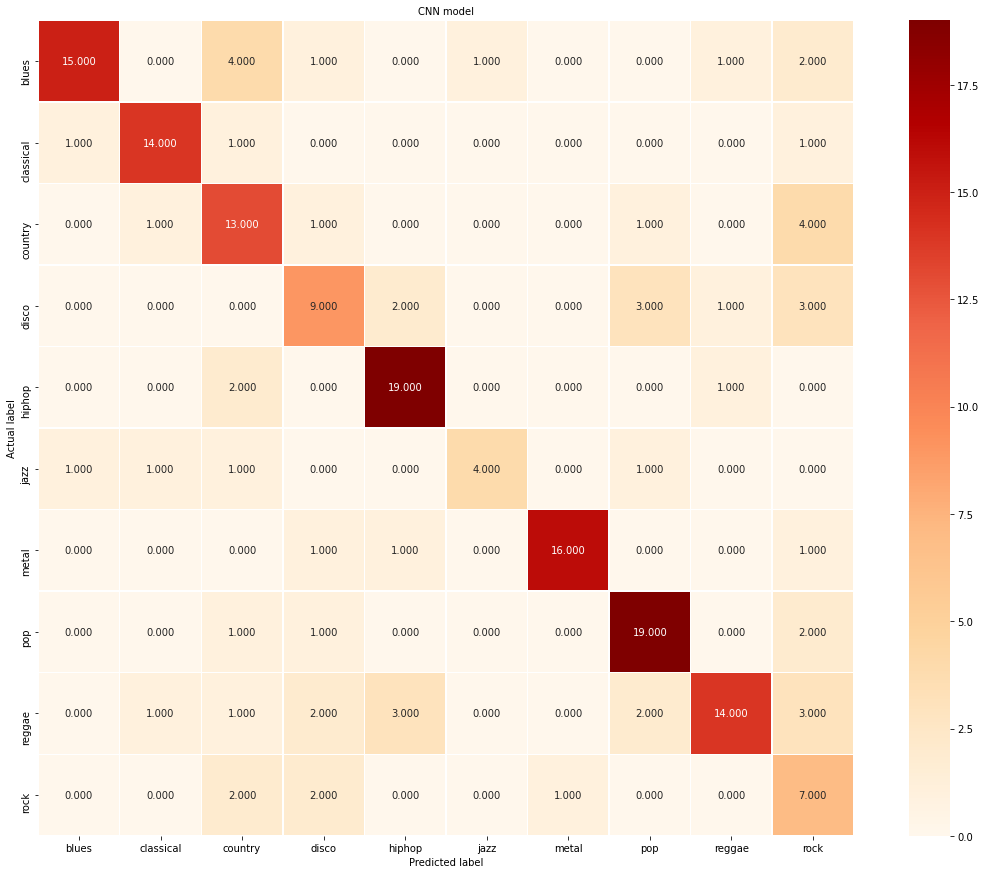

In [67]:
from sklearn import metrics
def plot_confusion(predictions ,y_test):
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(20,15))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd',xticklabels=val_ds.class_names\
               ,yticklabels=val_ds.class_names)
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
#     all_sample_title = 'Accuracy Score: {0}'.format(score)
   
    plt.title("CNN model", size = 10)
    
    plt.show()
print(len(y))
plot_confusion(yp,y)
# sns.savefig("output.png")